Ordinary least squares has best accuracy,it has highest R-Square value and lowest Mean squared error value. The performance measure actually tell me that I didn't get good result. I use a grid search to try out best parameter values. Attributes 'id' and 'date' are irrelevant to training. Attributes 'price' is the target of prediction. I use small size of data to increase speed. 

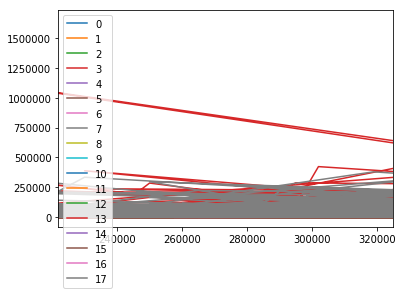

Coefficients: 
 [ -3.39679112e+04   4.09513566e+04   8.79577151e+01   1.50042181e-01
  -8.57023413e+02   5.94541283e+05   5.21325064e+04   2.73430448e+04
   9.06339579e+04   9.34269870e+01   5.51858919e+01  -2.92310294e+03
   2.06021675e+01  -5.89671754e+02   5.82285879e+05  -1.91371357e+05
   3.61416693e+01  -4.41271499e-01]
Mean squared error: 43231684558.17
Test OLS R-Square is 0.69
data size: 21613


In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (r2_score, mean_squared_error)

regression = pd.read_csv("./regression_data.csv")
regression.head()
#Drop attributes
regression = regression.drop(['id','date'],axis=1)
Y = regression.price.values
regression = regression.drop(['price'], axis=1)
X = regression.as_matrix()
t = pd.DataFrame(X,index = Y )
t.plot()
plt.show()
#Split the data set into a training set (80%) and a testing set (20%)
regression_X_train = X[:-4323]
regression_X_test =  X[(21613-4323):21613]

regression_y_train = Y[:-4323]
regression_y_test =  Y[(21613-4323):21613]

#Ordinary least squares
lr = LinearRegression(normalize=True)
lr.fit(regression_X_train, regression_y_train)
dataPred = lr.predict(regression_X_test)
print('Coefficients: \n', lr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
print('Test OLS R-Square is %.2f' % r2_score(regression_y_test, dataPred))
print('data size: 21613')

In [15]:
#Lasso Regression with a regularization coefficient of 0.001
from sklearn.linear_model import (Lasso)
lr = Lasso(alpha=0.001)
lr.fit(regression_X_train, regression_y_train)
dataPred = lr.predict(regression_X_test)
print('Coefficients: \n', lr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
print('Test Lasso R-Square is %.2f' % r2_score(regression_y_test, dataPred))

Coefficients: 
 [ -3.39679099e+04   4.09513501e+04   2.79823931e+02   1.50042150e-01
  -8.57011408e+02   5.94541138e+05   5.21325110e+04   2.73430421e+04
   9.06339594e+04  -9.84392303e+01  -1.36680314e+02  -2.92310313e+03
   2.06021675e+01  -5.89671627e+02   5.82285812e+05  -1.91371262e+05
   3.61416689e+01  -4.41271545e-01]
Mean squared error: 43231684951.74
Test Lasso R-Square is 0.69


/Users/t0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [16]:
#Lasso Regression with a regularization coefficient of 0.01
lr = Lasso(alpha=0.01)
lr.fit(regression_X_train, regression_y_train)
dataPred = lr.predict(regression_X_test)
print('Coefficients: \n', lr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
print('Test Lasso R-Square is %.2f' % r2_score(regression_y_test, dataPred))

Coefficients: 
 [ -3.39678987e+04   4.09512916e+04   2.79823941e+02   1.50041869e-01
  -8.56903358e+02   5.94539829e+05   5.21325526e+04   2.73430175e+04
   9.06339734e+04  -9.84392556e+01  -1.36680234e+02  -2.92310483e+03
   2.06021679e+01  -5.89670490e+02   5.82285209e+05  -1.91370405e+05
   3.61416651e+01  -4.41271952e-01]
Mean squared error: 43231688493.93
Test Lasso R-Square is 0.69


/Users/t0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [17]:
#Lasso Regression with a regularization coefficient of 0.1
lr = Lasso(alpha=0.1)
lr.fit(regression_X_train, regression_y_train)
dataPred = lr.predict(regression_X_test)
print('Coefficients: \n', lr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
print('Test Lasso R-Square is %.2f' % r2_score(regression_y_test, dataPred))

Coefficients: 
 [ -3.39677859e+04   4.09507063e+04   2.79824042e+02   1.50039054e-01
  -8.55822862e+02   5.94526738e+05   5.21329684e+04   2.73427711e+04
   9.06341127e+04  -9.84395090e+01  -1.36679432e+02  -2.92312182e+03
   2.06021722e+01  -5.89659112e+02   5.82279176e+05  -1.91361836e+05
   3.61416270e+01  -4.41276027e-01]
Mean squared error: 43231723918.42
Test Lasso R-Square is 0.69


/Users/t0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [5]:
#Lasso Regression with a regularization coefficient of 1
lr = Lasso(alpha=1)
lr.fit(regression_X_train, regression_y_train)
dataPred = lr.predict(regression_X_test)
print('Coefficients: \n', lr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
print('Test Lasso R-Square is %.2f' % r2_score(regression_y_test, dataPred))

Coefficients: 
 [ -3.39666584e+04   4.09448533e+04   2.79825052e+02   1.50010903e-01
  -8.45017900e+02   5.94395833e+05   5.21371272e+04   2.73403078e+04
   9.06355055e+04  -9.84420424e+01  -1.36671422e+02  -2.92329179e+03
   2.06022153e+01  -5.89545339e+02   5.82218850e+05  -1.91276143e+05
   3.61412459e+01  -4.41316777e-01]
Mean squared error: 43232078427.08
Test Lasso R-Square is 0.69


/Users/t0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [6]:
#Lasso Regression with a regularization coefficient of 2
lr = Lasso(alpha=2)
lr.fit(regression_X_train, regression_y_train)
dataPred = lr.predict(regression_X_test)
print('Coefficients: \n', lr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
print('Test Lasso R-Square is %.2f' % r2_score(regression_y_test, dataPred))

Coefficients: 
 [ -3.39654055e+04   4.09383500e+04   2.79826174e+02   1.49979625e-01
  -8.33012387e+02   5.94250382e+05   5.21417480e+04   2.73375708e+04
   9.06370532e+04  -9.84448573e+01  -1.36662522e+02  -2.92348063e+03
   2.06022630e+01  -5.89418924e+02   5.82151821e+05  -1.91180929e+05
   3.61408226e+01  -4.41362054e-01]
Mean squared error: 43232472887.96
Test Lasso R-Square is 0.69


/Users/t0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [22]:
#KernelRidge with kernel='linear'
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
#To reduce time, split the data set into a training set of 2000 (80%) and a testing set of 500 (20%)
regression_X_train = X[:-19613]
regression_X_test =  X[(21613-500):21613]
regression_y_train = Y[:-19613]
regression_y_test =  Y[(21613-500):21613]
lr = GridSearchCV(KernelRidge(kernel='linear', gamma=1), cv=5,
                  param_grid={"alpha": [2,4,7],
                              "gamma": [0.1, 0.5, 1, 2, 4]})
#GridSearchCV is with 5-fold cross-validation and it includes grid search
lr.fit = lr.fit(regression_X_train, regression_y_train)
regression_y_train1 = lr.predict(regression_X_train)
dataPred = lr.predict(regression_X_test)
print("R^2 on test dataset by Linear KRR: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by Linear KRR:  0.684953331937
#Mean squared error: 47719670674.63

R^2 on test dataset by Linear KRR:  0.684953331937
Mean squared error: 47719670674.63


In [8]:
#KernelRidge with kernel='poly'
lr = GridSearchCV(KernelRidge(kernel='poly', gamma=1), cv=5,
                  param_grid={"alpha": [2,4,7],
                              "gamma": [0.1, 0.5, 1, 2, 4]})
#GridSearchCV is with 5-fold cross-validation
lr.fit = lr.fit(regression_X_train, regression_y_train)
regression_y_train1 = lr.predict(regression_X_train)
dataPred = lr.predict(regression_X_test)
print("R^2 on test dataset by poly KRR: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by poly KRR:  -6.0588521498
#Mean squared error: 1069194294292.21

/Users/t0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/t0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/t0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/t0/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/t0/anaconda3/lib/python3.6/si

R^2 on test dataset by poly KRR:  -6.0588521498
Mean squared error: 1069194294292.21


In [23]:
#KernelRidge with kernel='rbf'
lr = GridSearchCV(KernelRidge(kernel='rbf', gamma=1), cv=5,
                  param_grid={"alpha": [2,4,7],
                              "gamma": [0.1, 0.5, 1, 2, 4]})
#GridSearchCV is with 5-fold cross-validation
lr.fit = lr.fit(regression_X_train, regression_y_train)
regression_y_train1 = lr.predict(regression_X_train)
dataPred = lr.predict(regression_X_test)
print("R^2 on test dataset by rbf KRR: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by rbf KRR:  -2.48943059639
#Mean squared error: 528539088907.11

R^2 on test dataset by rbf KRR:  -2.48943059639
Mean squared error: 528539088907.11
